<a href="https://colab.research.google.com/github/AyraCaps/Dsa-arya/blob/main/Arya_P_model_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Assignment – Model Selection**

In [994]:
#Import Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load the Dataset into python environment**

In [995]:
#Load the dataset into python environment
data = pd.read_csv('/content/titanic_dataset .csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


 ***Basic details of the Dataset***

In [996]:
data.head() #first 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [997]:
data.tail() #last 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [998]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [999]:
data.describe() #statistical summary

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Drop ‘PassengerId’, 'Name' and  'Ticket' columns**

In [1000]:
# drop some unnecessary colummns
data=data.drop(['PassengerId','Name','Ticket'],axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


***Handling Missing values***


In [1001]:
# To check  missing values
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

there are missing values in Age, Cabin, Embarked columns.

In [1002]:
# To replace missing values
data.Age=data['Age'].fillna(data['Age'].median()) # replace the missing values with median.
data.Embarked=data['Embarked'].fillna(data['Embarked'].mode()[0])


In [1003]:
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [1004]:
data['Survived'].groupby(data['Cabin'].isnull()).mean()

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [1005]:
# create indicator for Cabin
data['cabin_ind']=np.where(data['Cabin'].isnull(),0,1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,cabin_ind
0,0,3,male,22.0,1,0,7.2500,NaN,S,0
1,1,1,female,38.0,1,0,71.2833,C85,C,1
2,1,3,female,26.0,0,0,7.9250,NaN,S,0
3,1,1,female,35.0,1,0,53.1000,C123,S,1
4,0,3,male,35.0,0,0,8.0500,NaN,S,0


In [1006]:
# drop  cabin
data.drop('Cabin',axis=1,inplace=True)

In [1007]:
# combine SibSp and  Parch then drop SibSp and Parch column
data['Family_count']=data['SibSp']+ data['Parch']
data.drop(['SibSp','Parch'],axis=1,inplace=True)

In [1008]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_ind,Family_count
0,0,3,male,22.0,7.2500,S,0,1
1,1,1,female,38.0,71.2833,C,1,1
2,1,3,female,26.0,7.9250,S,0,0
3,1,1,female,35.0,53.1000,S,1,1
4,0,3,male,35.0,8.0500,S,0,0


**Outlier Handling**

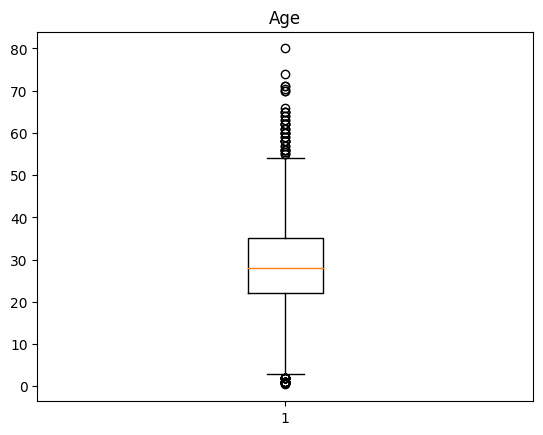

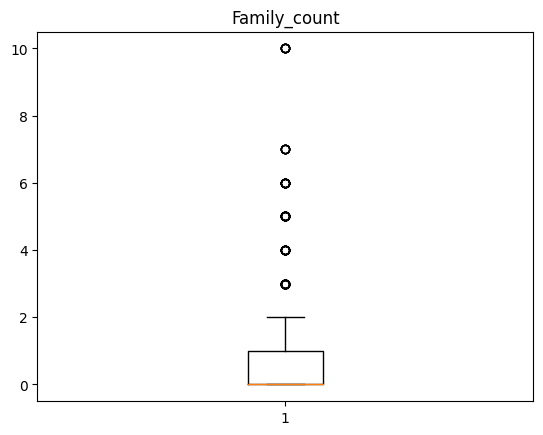

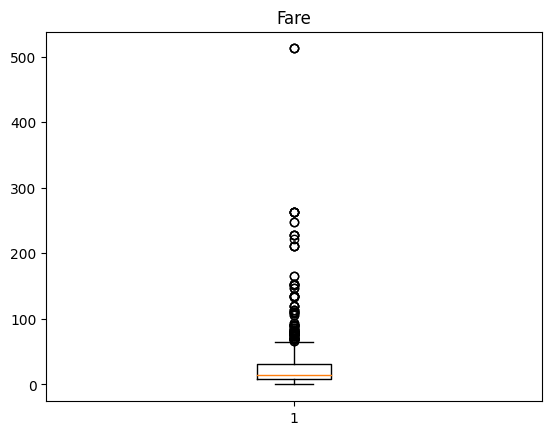

In [1009]:
for i in data[['Age','Family_count','Fare']]:
  plt.figure()
  plt.boxplot(data[i])  # BOXPLOT
  plt.title(i);

In [1010]:
 #Calculating the interquartile range
for i in data[['Age','Family_count','Fare']]:
  print(i)
  Q1 = np.percentile(data[i],25,method='midpoint')
  Q2 = np.percentile(data[i],50,method='midpoint')
  Q3 = np.percentile(data[i],75,method='midpoint')
  IQR =Q3 - Q1

  print("Q1 is: ",Q1)
  print("Q2 is: ",Q2)
  print("Q3 is: ",Q3)
  print('IQR =',IQR)

  #Finding the lower limit and upper limit
  low_lim = Q1 - 1.5*IQR
  up_lim = Q3 +1.5*IQR
  print('lower limit = ',low_lim )
  print('upper limit  ',up_lim )
  print("-------------------")

Age
Q1 is:  22.0
Q2 is:  28.0
Q3 is:  35.0
IQR = 13.0
lower limit =  2.5
upper limit   54.5
-------------------
Family_count
Q1 is:  0.0
Q2 is:  0.0
Q3 is:  1.0
IQR = 1.0
lower limit =  -1.5
upper limit   2.5
-------------------
Fare
Q1 is:  7.9104
Q2 is:  14.4542
Q3 is:  31.0
IQR = 23.0896
lower limit =  -26.724
upper limit   65.6344
-------------------


In [1011]:
data.groupby(data['Fare'].sort_values()).value_counts()



Fare      Survived  Pclass  Sex     Age   Fare      Embarked  cabin_ind  Family_count
0.0000    0         2       male    28.0  0.0000    S         0          0               6
                    1       male    28.0  0.0000    S         0          0               1
                                    38.0  0.0000    S         0          0               1
                                    39.0  0.0000    S         1          0               1
                                    40.0  0.0000    S         1          0               1
                                                                                        ..
263.0000  1         1       female  23.0  263.0000  S         1          5               1
                                    24.0  263.0000  S         1          5               1
512.3292  1         1       female  35.0  512.3292  C         0          0               1
                            male    35.0  512.3292  C         1          0               1
    

In [1012]:
data['Fare'].loc[(data['Fare']>300)].index

Int64Index([258, 679, 737], dtype='int64')

In [1013]:
data['Fare'].loc[(data['Fare']==0.0000)].index

Int64Index([179, 263, 271, 277, 302, 413, 466, 481, 597, 633, 674, 732, 806,
            815, 822],
           dtype='int64')

In [1014]:
data['Age'].loc[(data['Age']<1)].index

Int64Index([78, 305, 469, 644, 755, 803, 831], dtype='int64')

In [ ]:
# replacing highly extream values

In [1017]:
data['Fare']=data['Fare'].apply(lambda x : 15.1 if x < 1 else x)

In [1018]:
data['Fare'].median()

15.1

In [1019]:
data['Fare']=data['Fare'].apply(lambda x : 263 if x  >400 else x)

In [1020]:
data['Age']=data['Age'].apply(lambda x : 1 if x < 1 else x)

In [1021]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_ind,Family_count
0,0,3,male,22.0,7.2500,S,0,1
1,1,1,female,38.0,71.2833,C,1,1
2,1,3,female,26.0,7.9250,S,0,0
3,1,1,female,35.0,53.1000,S,1,1
4,0,3,male,35.0,8.0500,S,0,0


***Label encoding***

In [1022]:
#Label encoding - Sex' and 'Embarked' columns
from sklearn.preprocessing  import LabelEncoder
label_encoder = LabelEncoder()
# FITTING THE TRANSFORM
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])

In [1023]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_ind,Family_count
0,0,3,1,22.0,7.2500,2,0,1
1,1,1,0,38.0,71.2833,0,1,1
2,1,3,0,26.0,7.9250,2,0,0
3,1,1,0,35.0,53.1000,2,1,1
4,0,3,1,35.0,8.0500,2,0,0


In [1024]:
data.shape

(891, 8)

**correlation**

<Axes: >

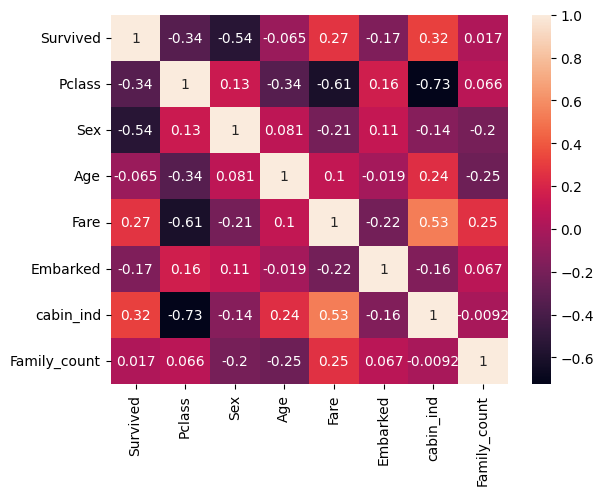

In [1025]:
sns.heatmap(data.corr(),annot=True)

In [1026]:
x=data.drop('Survived',axis=1)
y=data['Survived']

In [1027]:
# Scale the numerical columns using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x=scaler.fit_transform(x) #scaling x


**Split the dataset into train  and test set**

In [1028]:
from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=4,test_size=.4)







**k- NN Model**




In [1029]:
from sklearn.neighbors import KNeighborsClassifier

In [1030]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [1031]:
metric_k=[]
neighbors=np.arange(3,16)

In [1032]:
 for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  classifier.fit(x_train,y_train)
  knn_pred=classifier.predict(x_test)
  accuracy=accuracy_score(y_test,knn_pred)
  metric_k.append(accuracy)

Text(0, 0.5, 'metric k')

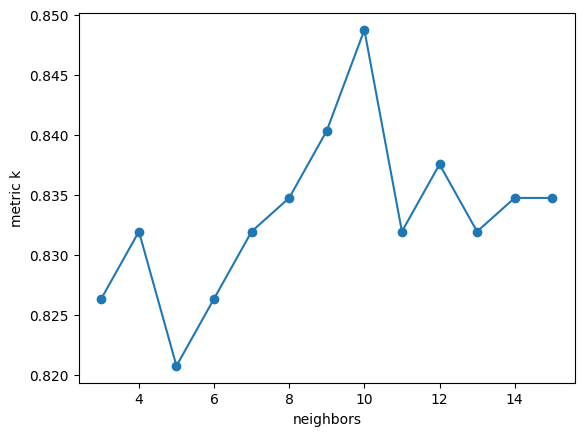

In [1033]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('neighbors')
plt.ylabel('metric k')

In [1034]:
# k= 10
classifier=KNeighborsClassifier(n_neighbors=10,metric='minkowski',p=2)
classifier.fit(x_train,y_train)
knn_pred=classifier.predict(x_test)
accuracy=accuracy_score(y_test,knn_pred)
metric_k.append(accuracy)

In [1035]:
print('Acurracy: ',accuracy_score(y_test,knn_pred))
print('Precision: ',precision_score(y_test,knn_pred))
print('recall: ',recall_score(y_test,knn_pred))
print('F1: ',f1_score(y_test,knn_pred))

Acurracy:  0.8487394957983193
Precision:  0.8709677419354839
recall:  0.6585365853658537
F1:  0.75


**SVM model**

In [1036]:
from sklearn.svm import SVC
svc_clf=SVC()
svc_clf.fit(x_train,y_train)

SVC()

In [1037]:
y_pred=svc_clf.predict(x_test)

In [1038]:
print('Acurracy: ',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Acurracy:  0.84593837535014
[[218  16]
 [ 39  84]]


In [1039]:
from sklearn.svm import SVC           # svc- support vector classification
svc_clf=SVC(kernel='rbf',gamma=0.1,C=1)
svc_clf.fit(x_train,y_train)

SVC(C=1, gamma=0.1)

In [1040]:
y_pred=svc_clf.predict(x_test)

In [1041]:
print('Acurracy: ',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Acurracy:  0.8515406162464986
[[218  16]
 [ 37  86]]


**K Fold cross validation**

In [1042]:
from sklearn.model_selection import KFold
kfold_validator=KFold(10)

In [1043]:
for train_index,test_index in kfold_validator.split(x,y):
    print('Training index: ',train_index)
    print('Testing index: ',test_index)

Training index:  [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 3

In [1044]:
# k-NN - k fold cross validation



*k-NN - k fold cross validation*



In [1045]:
from sklearn.model_selection import cross_val_score
cv_result=cross_val_score(classifier,x,y,cv=kfold_validator)

In [1046]:
cv_result

array([0.78888889, 0.80898876, 0.79775281, 0.80898876, 0.82022472,
       0.79775281, 0.79775281, 0.78651685, 0.87640449, 0.76404494])

In [1047]:
cv_result.mean()

0.8047315855181024

*SVM - K fold cross validation*

In [1048]:
# SVM K fold

In [1049]:
from sklearn.model_selection import cross_val_score
cv_result_svm=cross_val_score(svc_clf,x,y,cv=kfold_validator)

In [1050]:
cv_result_svm

array([0.78888889, 0.84269663, 0.79775281, 0.82022472, 0.79775281,
       0.78651685, 0.79775281, 0.7752809 , 0.8988764 , 0.83146067])

In [1051]:
cv_result_svm.mean()

0.8137203495630463

In [1052]:
print('Average k- fold cross validation score of SVM Model is : ',round(cv_result_svm.mean(),4))
print('Average k- fold cross validation score of k-NN Model is : ',round(cv_result.mean(),4))

Average k- fold cross validation score of SVM Model is :  0.8137
Average k- fold cross validation score of k-NN Model is :  0.8047


 **Stratified Cross validation**

In [1053]:
from sklearn.model_selection import StratifiedKFold
strat_validator=StratifiedKFold(n_splits=10)

In [1054]:
for train_index,test_index in strat_validator.split(x,y):
    print('Training index: ',train_index)
    print('Testing index: ',test_index)

Training index:  [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 3

*k-NN - stratified cross validation*

In [1055]:
skr_cv_result=cross_val_score(classifier,x,y,cv=strat_validator)
skr_cv_result

array([0.78888889, 0.79775281, 0.7752809 , 0.83146067, 0.83146067,
       0.80898876, 0.82022472, 0.78651685, 0.85393258, 0.76404494])

In [1056]:
skr_cv_result.mean()

0.8058551810237203

*SVM - stratified cross validation*

In [1057]:
skr_cv_result_svm=cross_val_score(svc_clf,x,y,cv=strat_validator)
skr_cv_result_svm

array([0.81111111, 0.82022472, 0.76404494, 0.84269663, 0.80898876,
       0.78651685, 0.82022472, 0.78651685, 0.86516854, 0.83146067])

In [1058]:
skr_cv_result_svm.mean()

0.8136953807740325

In [1059]:
print('Average Stratified cross validation score of SVM Model is : ',round(skr_cv_result_svm.mean(),4))
print('Average Stratified cross validation score of k-NN Model is : ',round(skr_cv_result.mean(),4))

Average Stratified cross validation score of SVM Model is :  0.8137
Average Stratified cross validation score of k-NN Model is :  0.8059
